In [1]:
import tensorflow as tf
from tensorflow import keras
import os

In [2]:
cifar_dir = '../30days_tensorflow2/data/cifar2'
train_dir = os.path.join(cifar_dir,'train')
test_dir = os.path.join(cifar_dir,'test')

In [5]:
os.path.exists(train_dir)

True

In [7]:
batch_size = 32

train_gen = keras.preprocessing.image.ImageDataGenerator(
                                                    width_shift_range=0.3,
                                                    height_shift_range=0.3,
                                                    zoom_range=0.3,
                                                    horizontal_flip=True,
                                                    vertical_flip=True,
                                                    rescale=1./255,
                                                )
test_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_data_gen = train_gen.flow_from_directory(
                                            train_dir,
                                            target_size = (32,32),
                                            batch_size = batch_size,
                                            class_mode = 'binary'
                                            )
test_data_gen = test_gen.flow_from_directory(test_dir,
                                            target_size = (32,32),
                                            batch_size = batch_size,
                                            class_mode = 'binary')

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


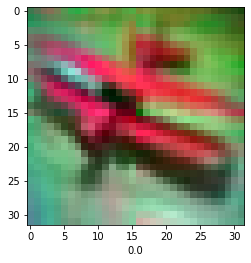

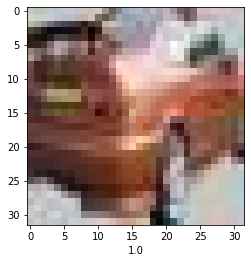

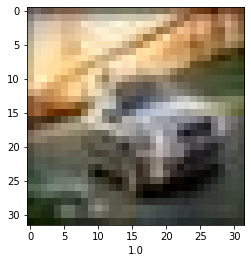

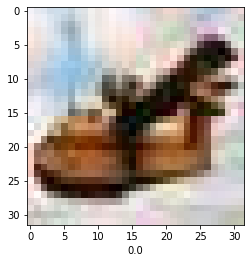

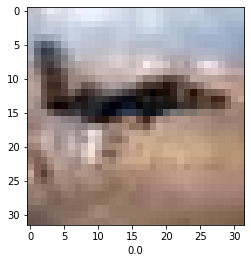

In [23]:
import matplotlib.pyplot as plt
for x , y in iter(test_data_gen):
    for img,label in zip(x[:5],y[:5]):
        plt.imshow(img)
        plt.xlabel(label)
        plt.show()
    break

In [28]:
def my_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(32,(3,3),padding = 'same',activation='relu',input_shape = (32,32,3)))
    model.add(keras.layers.MaxPool2D())
    model.add(keras.layers.Conv2D(64,(5,5),padding = 'same',activation='relu',input_shape = (32,32,3)))
    model.add(keras.layers.MaxPool2D())
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(32,activation='relu'))
    model.add(keras.layers.Dense(1,activation = 'sigmoid'))

    return model

In [29]:
model = my_model()
model.compile(loss = keras.losses.binary_crossentropy,
                 optimizer = 'adam',
                 metrics = [
                     'accuracy',
                            ])
callbacks = [keras.callbacks.EarlyStopping(patience=5,min_delta=0.001)]
history = model.fit(train_data_gen, epochs = 100,
                    steps_per_epoch = train_data_gen.samples//batch_size,
                     validation_data = test_data_gen, 
                    validation_steps = test_data_gen.samples//batch_size,
                      callbacks = callbacks
         )

Train for 312 steps, validate for 62 steps
Epoch 1/100
312/312 [==============================] - 94s 303ms/step - loss: 0.5429 - accuracy: 0.7171 - val_loss: 0.3991 - val_accuracy: 0.8221
Epoch 2/100
312/312 [==============================] - 85s 272ms/step - loss: 0.4561 - accuracy: 0.7915 - val_loss: 0.4725 - val_accuracy: 0.7818
Epoch 3/100
312/312 [==============================] - 91s 291ms/step - loss: 0.4220 - accuracy: 0.8113 - val_loss: 0.3356 - val_accuracy: 0.8553
Epoch 4/100
  1/312 [..............................] - ETA: 57:03WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: 


KeyboardInterrupt: 